## Comparison of LinearRegression & Stochastic Gradient Descent ( sklearn & from scratch) on boston dataset

In [1]:
# importing the libraries used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# dataset loading

from sklearn import datasets
boston = datasets.load_boston()
dataset = pd.DataFrame(data = boston.data , columns = boston.feature_names )
dataset['PRICE($)'] = boston.target

In [80]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE($)
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM        506 non-null float64
ZN          506 non-null float64
INDUS       506 non-null float64
CHAS        506 non-null float64
NOX         506 non-null float64
RM          506 non-null float64
AGE         506 non-null float64
DIS         506 non-null float64
RAD         506 non-null float64
TAX         506 non-null float64
PTRATIO     506 non-null float64
B           506 non-null float64
LSTAT       506 non-null float64
PRICE($)    506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [81]:
#forming input and output dataset. .  .

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


In [82]:
#forming training and testing dataset. . . .

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 )

In [83]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((379, 13), (379,), (127, 13), (127,))

In [84]:
# feature scaling of input data (x varaible only)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


## MODEL1:

## Linear Regression 

In [85]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(normalize=False).fit(X_train, y_train)

y_pred = reg.predict(X_test)

per_lr = reg.score(X_test , y_test)

per_lr

0.6820167698300977

In [86]:
reg.coef_

array([-0.94583921,  1.02611869,  0.1220707 ,  0.48552321, -2.03708994,
        2.8663022 , -0.63655482, -3.30491115,  2.60685331, -2.26014761,
       -2.20580608,  0.84525221, -3.29866837])

In [87]:
reg.intercept_

22.765963060686065

In [90]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MSE_lr = mean_squared_error(y_test, y_pred)

RMSE_lr = sqrt(MSE_lr)

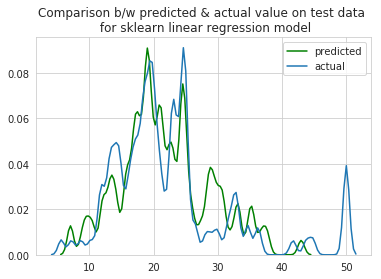

In [12]:


sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5 , color = 'g', label = 'predicted')
sns.kdeplot(np.array(y_test), bw=0.5 , label = 'actual')
plt.title('Comparison b/w predicted & actual value on test data \n for sklearn linear regression model')



plt.show()

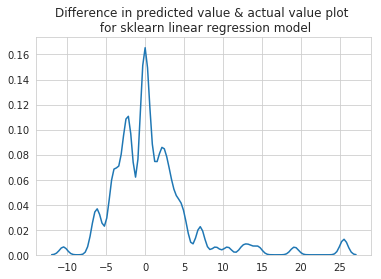

In [13]:
delta_y = y_test - y_pred;

sns.set_style('whitegrid')

sns.kdeplot(np.array(delta_y), bw=0.5)
plt.title('Difference in predicted value & actual value plot \n for sklearn linear regression model')
plt.show()

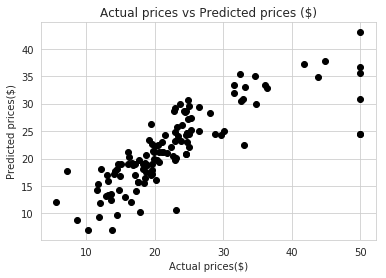

In [14]:
plt.scatter(y_test, y_pred , color = 'black')
plt.xlabel("Actual prices($)")
plt.ylabel("Predicted prices($)")
plt.title("Actual prices vs Predicted prices ($)")
plt.show()

## MODEL2:

## SGD for sklearn

In [91]:
from sklearn import linear_model

sgd_sk = linear_model.SGDRegressor(max_iter=1000)

sgd_sk.fit(X_train, y_train)

y_pred = sgd_sk.predict(X_test)
per_sgd_sk = sgd_sk.score(X_test , y_test)

per_sgd_sk



0.6817837169697634

In [92]:
sgd_sk.coef_

array([-0.94798402,  1.02886992,  0.11553601,  0.49089092, -2.04241178,
        2.87201961, -0.63814212, -3.30324964,  2.60686274, -2.25787159,
       -2.20654678,  0.84563929, -3.3038495 ])

In [93]:
sgd_sk.intercept_

array([22.76882057])

In [95]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MSE_sgd_sk = mean_squared_error(y_test, y_pred)

RMSE_sgd_sk = sqrt(MSE_sgd_sk)

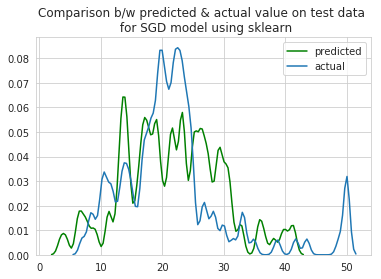

In [94]:


sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5 , color = 'g', label = 'predicted')
sns.kdeplot(np.array(y_test), bw=0.5 , label = 'actual')
plt.title('Comparison b/w predicted & actual value on test data \n for SGD model using sklearn')



plt.show()

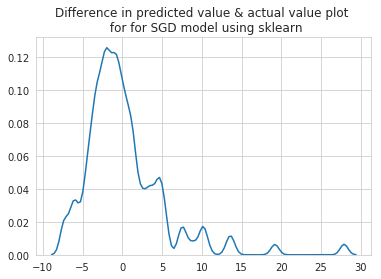

In [96]:
delta_y = y_test - y_pred;

sns.set_style('whitegrid')

sns.kdeplot(np.array(delta_y), bw=0.5)
plt.title('Difference in predicted value & actual value plot \n for for SGD model using sklearn')
plt.show()

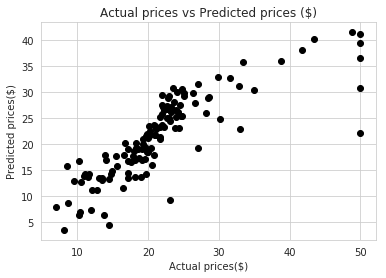

In [98]:
plt.scatter(y_test, y_pred , color = 'black')
plt.xlabel("Actual prices($)")
plt.ylabel("Predicted prices($)")
plt.title("Actual prices vs Predicted prices ($)")
plt.show()

## MODEL3:


## SGD from scratch

In [21]:
import random

In [28]:
# ran_train_gen -----> used to generate k random samples from training data . . . .

def ran_train_gen(X_tr, y_tr , k):
    
    k_value = random.sample(range(1, X_tr.shape[0]), k) 
    
    X = np.zeros([k,X_tr.shape[1]]) #shape = (k,13)
    y = np.zeros([k]) #shape = (k)
   
    count = 0
    
    for val in k_value:
        X[count, :] = X_tr[val,:]
        y[count] = y_tr[val]
        count +=1
        
    return (X , y )
    

# function calculate W[1]*X + W[0] for every data point and return its value
def hypothesis(w,x, b):
    dot_pro = 0
    for i in range(13):
        dot_pro += w[i]*x[i]
    return dot_pro + b


# function calculate mean error

def error(X , y , W, B , k ):
    
    err_W = np.zeros(13)
    err_B = 0
    
    for i in range(k):
 
        err_W += X[i]*(y[i] - hypothesis(W,X[i], B))
        err_B += (y[i] - hypothesis(W,X[i], B))
        
    err_W = err_W*(-2.0/k)
    err_B = err_B*(-2.0/k)
    
    return err_W , err_B
    
    

def SGD(X_tr, y_tr, lr, k, W, B):
    
    X, y = ran_train_gen(X_tr , y_tr , k)
    
    err_W , err_B = error(X, y, W,B, k)
    
    new_W = W - lr*err_W
    new_B = B - lr*err_B
    
    
    return (new_W , new_B)

In [111]:
# initail weights and bias term . . .

W_0 = np.random.random((X_train.shape[1]))

B_0 = 0.0


print(W_0)
print(B_0)

[0.99928839 0.06452926 0.61978082 0.60397961 0.51117217 0.55120984
 0.30650467 0.58360465 0.83478134 0.64733432 0.39032478 0.02029852
 0.33528834]
0.0


In [112]:
lr = 0.01 # initial learning rate 
k = 50 #no of samples for each iteration
weight = W_0 #initial weight
bias = B_0 # initial bias term

for n_iter in range(5000):
    
    weight ,bias = SGD(X_train , y_train,lr,k , weight ,bias )
    



In [113]:
print(weight)
print(bias)


[-1.0056316   1.05402231  0.14433205  0.56243664 -2.12170035  2.75601321
 -0.65154851 -3.21692952  2.64045666 -2.29500222 -2.21814153  0.77770765
 -3.16476395]
22.65789656555572


In [114]:
#prediction with New weights generated
y_pred = np.zeros([y_test.shape[0]])
for i in range(y_test.shape[0]):
    y_pred[i] = hypothesis(weight, X_test[i] , bias)
    


In [115]:


MSE_sgd = mean_squared_error(y_test, y_pred)

RMSE_sgd = sqrt(MSE_sgd)

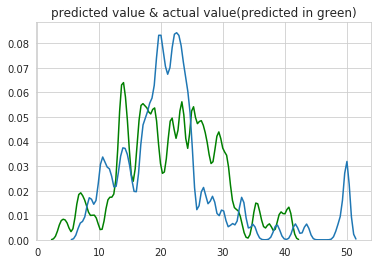

In [116]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5 , color = 'g')
sns.kdeplot(np.array(y_test), bw=0.5 )
plt.title('predicted value & actual value(predicted in green)')


plt.show()

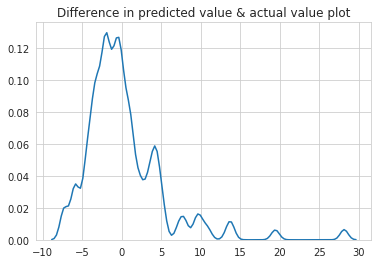

In [117]:
delta_y = y_test - y_pred;

sns.set_style('whitegrid')

sns.kdeplot(np.array(delta_y), bw=0.5)
plt.title('Difference in predicted value & actual value plot')
plt.show()

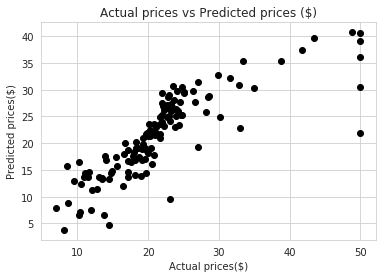

In [118]:
plt.scatter(y_test, y_pred , color = 'black')
plt.xlabel("Actual prices($)")
plt.ylabel("Predicted prices($)")
plt.title("Actual prices vs Predicted prices ($)")
plt.show()

In [122]:
from prettytable import PrettyTable

print ('\t \t\t Summary')
summ_ = PrettyTable()

column_names = ["Model", "MSE" ,"RMSE"]

summ_.add_column(column_names[0], ['LinearRegression' , 'SGD sklearn' , 'SGD scratch'])
summ_.add_column(column_names[1], [MSE_lr , MSE_sgd_sk , MSE_sgd])
summ_.add_column(column_names[2], [RMSE_lr , RMSE_sgd_sk , RMSE_sgd])  



print(summ_)                  

	 		 Summary
+------------------+--------------------+-------------------+
|      Model       |        MSE         |        RMSE       |
+------------------+--------------------+-------------------+
| LinearRegression | 25.50119360404228  | 5.049870652209052 |
|   SGD sklearn    | 25.519883665490454 | 5.051720861794568 |
|   SGD scratch    | 25.559064721678666 | 5.055597365463221 |
+------------------+--------------------+-------------------+
